In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
import math as math

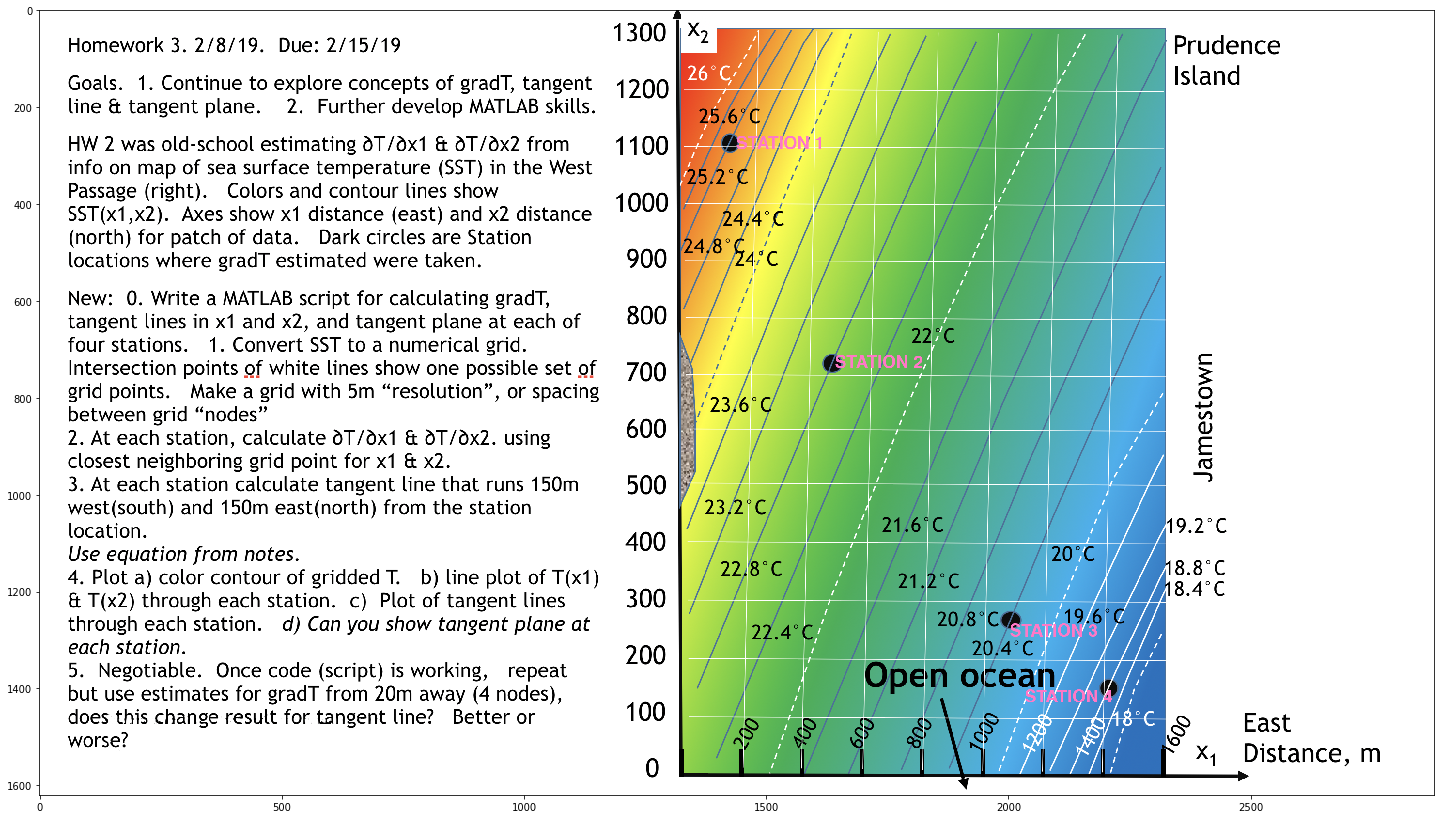

In [23]:
img=mpimg.imread('homework3.png')
plt.figure(figsize=(25, 16))
plt.imshow(img)

In [82]:
#get points for station 1 analysis
s1_0 =     np.array([190, 1105, 25.2])
s1_150_1 = np.array([340, 1105, 24.4]) #data from incremental 150m in x1
s1_150_2 = np.array([190,  955, 24.6]) #data from incremental 150m in x2

s1_20_1 = np.array([210, 1105, 25.1])  #data from incremental 20m in x1
s1_20_2 = np.array([190, 1085, 25.1])  #data from incremental 20m in x2

In [32]:
#obtained by contour inspection
T = np.array([
    [22.6,22.3,22.0,21.6,21.3,20.9,20.8,20.4,20.3,19.5,18.4,18.2,17.9,17.6],
    [22.9,22.6,22.2,21.9,21.5,21.1,20.8,20.5,20.4,20.1,19.6,18.9,18.3,17.6],
    [23.1,22.8,22.4,22.1,21.7,21.3,21.2,20.8,20.7,20.3,20.0,19.4,18.7,17.8],
    [23.3,23.0,22.6,22.3,21.9,21.5,21.4,21.0,20.9,20.5,20.2,19.7,19.1,18.3],
    [23.6,23.2,22.8,22.4,22.1,21.7,21.6,21.2,21.1,20.7,20.4,20.0,19.5,19.0],
    [24.2,23.5,23.0,22.7,22.3,21.9,21.8,21.4,21.3,20.9,20.6,20.2,19.8,19.5],
    [24.2,23.7,23.3,22.8,22.5,22.1,22.0,21.6,21.5,21.1,20.8,20.5,20.1,19.7],
    [24.4,23.9,23.5,23.1,22.7,22.3,22.2,21.8,21.7,21.3,21.0,20.6,20.3,20.1],
    [24.8,24.3,23.8,23.3,23.0,22.6,22.4,22.0,21.9,21.5,21.2,20.9,20.5,20.2],
    [25.2,24.7,24.1,23.6,23.2,22.8,22.7,22.3,22.1,21.7,21.4,21.0,20.7,20.4],
    [25.8,25.1,24.4,23.8,23.4,23.0,22.9,22.5,22.3,21.9,21.6,21.3,21.0,20.7],
    [26.0,25.5,24.8,24.1,23.7,23.3,23.1,22.7,22.6,22.2,21.8,21.5,21.2,20.9],
    [26.0,25.8,25.3,24.5,24.0,23.5,23.4,23.0,22.8,22.4,22.1,21.7,21.4,21.1],
    [26.0,26.0,25.7,25.0,24.3,23.8,23.5,23.1,23.0,22.6,22.3,22.0,21.8,21.5]
],object)

24.2


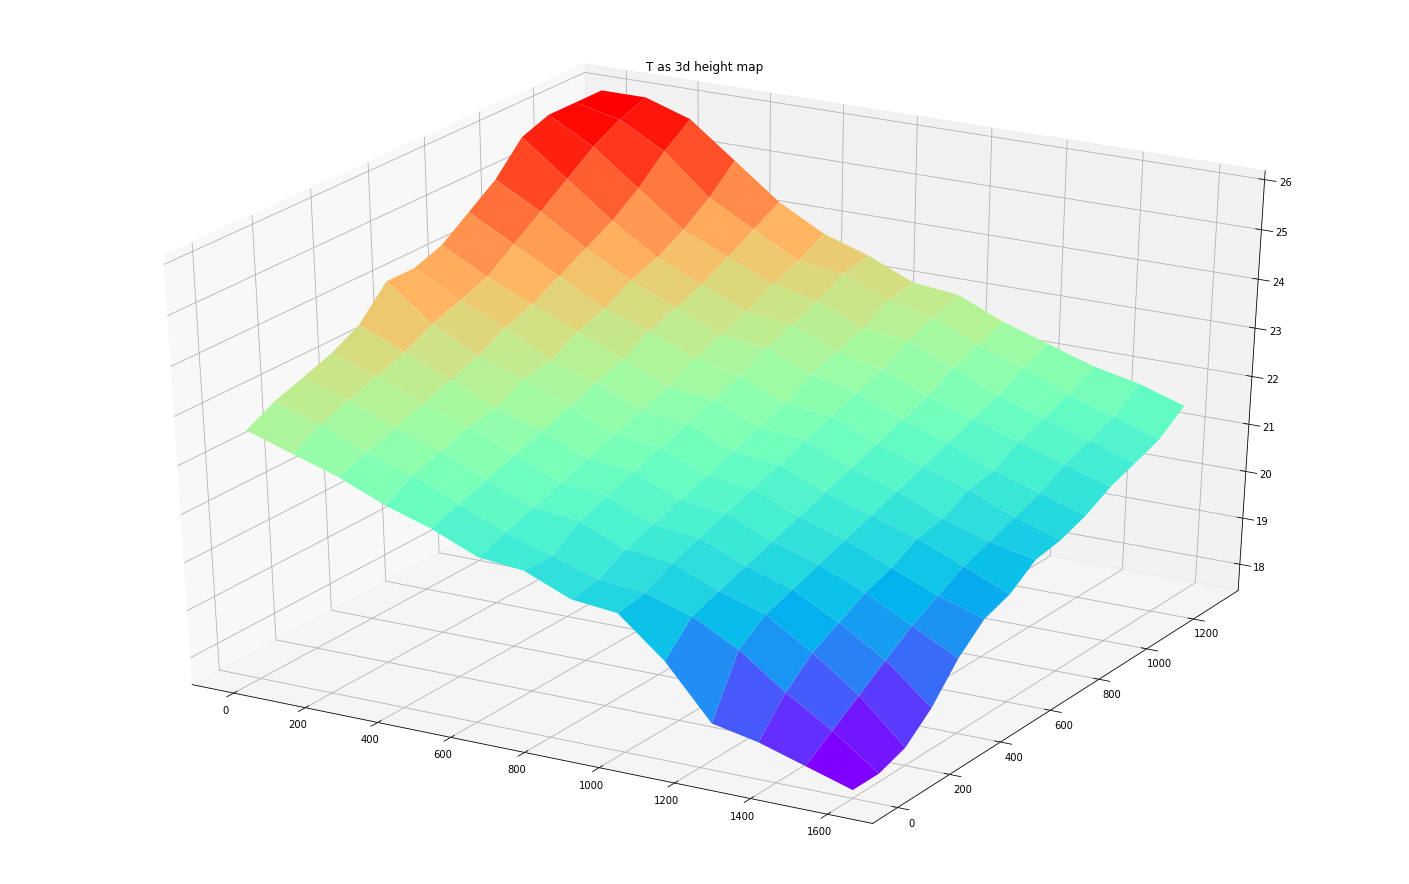

In [91]:
x, y = np.meshgrid(np.linspace(0, 1600, 14), np.linspace(0, 1300, 14))

# show temperature as points in 3d
fig = plt.figure(figsize=(25, 16))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, T, cmap='rainbow', edgecolor='none')
plt.title('T as 3d height map')
plt.show()

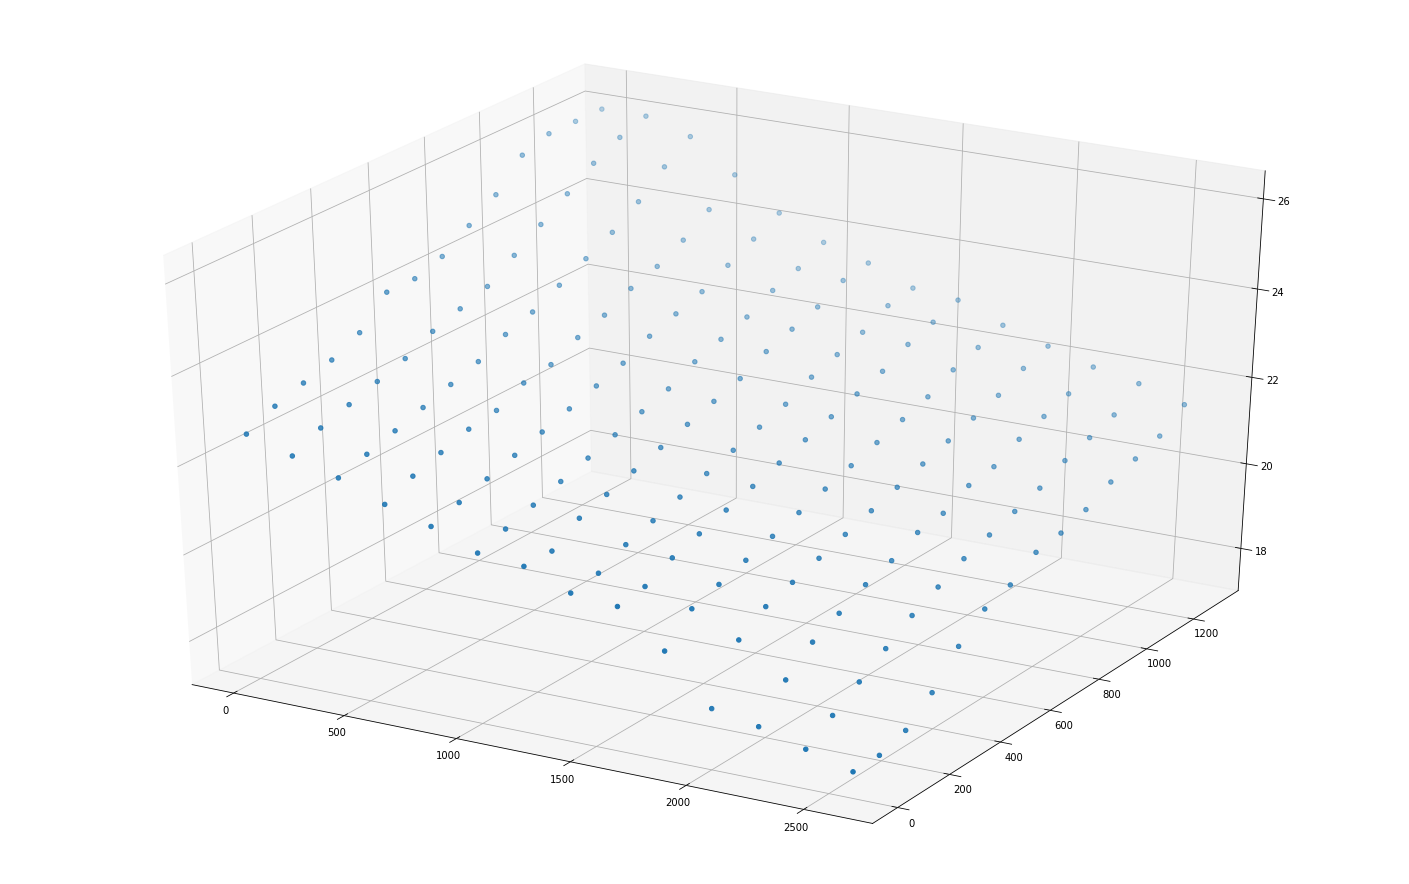

In [34]:
# show temperature as height map in 3d
fig = plt.figure(figsize=(25, 16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x, y, T);

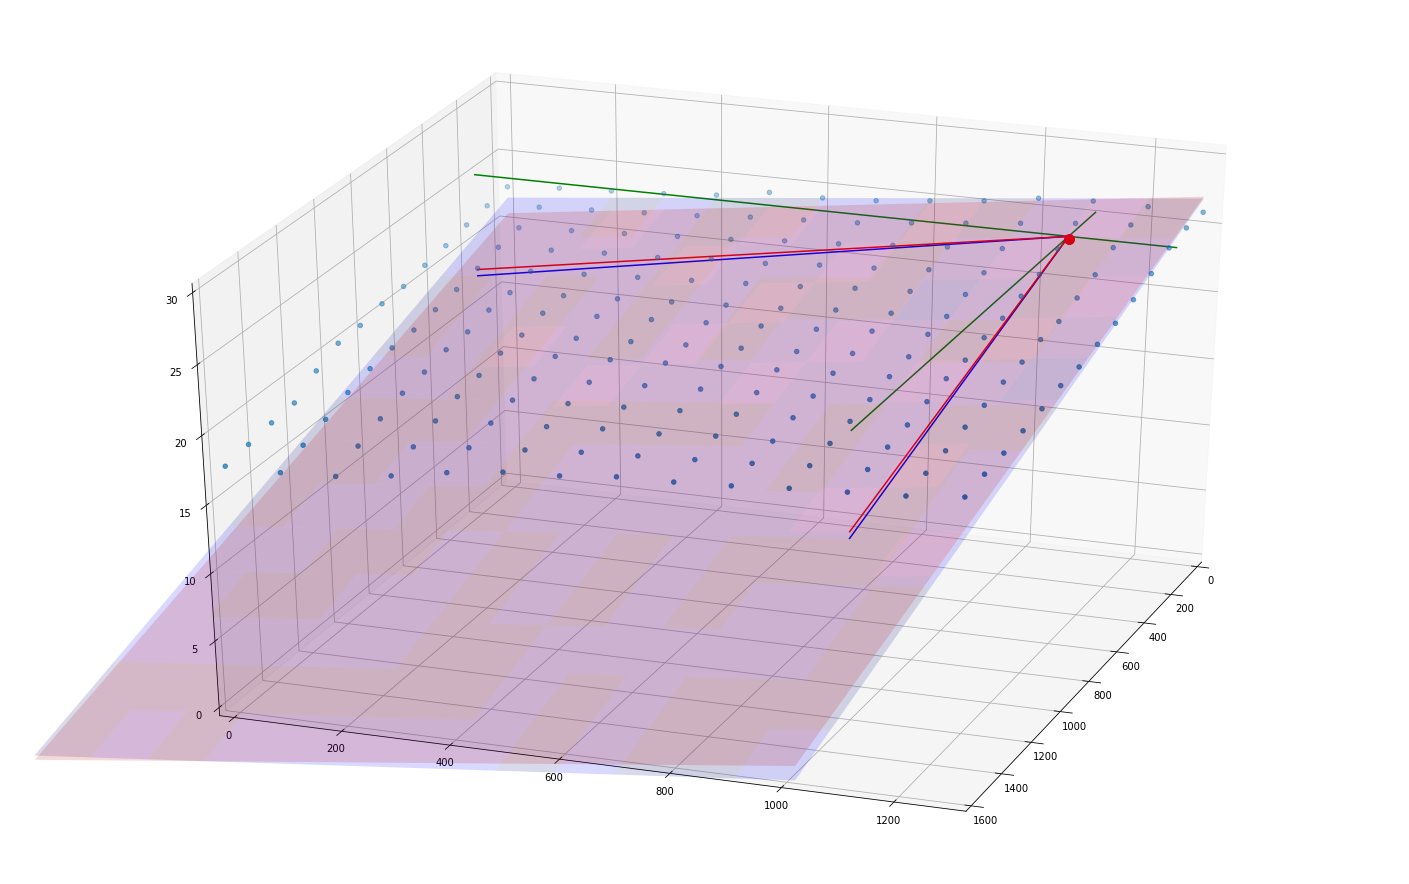

In [95]:
#PROCESS THE 150 METER DATA and PLOT TANGENTIAL PLANE
p1 = s1_0
p2 = s1_150_1 #data from incremental in x1
p3 = s1_150_2 #data from incremental in x2

# These two vectors are in the plane
v1 = p3 - p1
v2 = p2 - p1

# the cross product is a vector normal to the plane
normal = np.cross(v1, v2)
a, b, c = normal

# formula for a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. 

# so we have to calculate d from the station point
d = -p1.dot(normal)

# create an x,y mesh for uniform points on the plane
xx, yy = np.meshgrid(np.linspace(0, 2600, 14), np.linspace(0, 1300, 14))

# calculate each corresponding z on plane
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

plt3d = plt.figure(figsize=(25, 16)).gca(projection='3d')

# plot line plot of T
plt3d.plot([p1[0], p1[0]], [0, 1300], zs=[p1[2], p1[2]], color='g')
plt3d.plot([0, 1600], [p1[1], s1_150_1[1]], zs=[p1[2], p1[2]], color='g')

# plot the tangential lines
t1_z = (-normal[0] * 1600 - normal[1] * p1[1] - d) * 1. /normal[2]
t2_z = (-normal[0] * p1[0] - normal[1] * 0 - d) * 1. /normal[2]
plt3d.plot([1600, p1[0]], [p1[1], p1[1]], zs=[t1_z, p1[2]], color='b')
plt3d.plot([p1[0], p1[0]], [0, p1[1]], zs=[t1_z, p1[2]], color='b')

# plot the tangential plane (blue, 15% opacity)
plt3d.plot_surface(xx, yy, z, alpha=.15, color='b')

#PROCESS THE 20 METER DATA and PLOT TANGENTIAL PLANE
p2 = s1_20_1 #data from incremental in x1
p3 = s1_20_2 #data from incremental in x2

# These two vectors are in the plane
v1 = p3 - p1
v2 = p2 - p1

# the cross product is a vector normal to the plane
normal = np.cross(v1, v2)
a, b, c = normal

# calculate d from the station point
d = -p1.dot(normal)

# create an x,y mesh for uniform points on the plane
xx, yy = np.meshgrid(np.linspace(0, 2600, 14), np.linspace(0, 1300, 14))

# calculate each corresponding z on plane
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

# plot the tangential lines
t1_z = (-normal[0] * 1600 - normal[1] * p1[1] - d) * 1. /normal[2]
t2_z = (-normal[0] * p1[0] - normal[1] * 0 - d) * 1. /normal[2]
plt3d.plot([1600, p1[0]], [p1[1], p1[1]], zs=[t1_z, p1[2]], color='r')
plt3d.plot([p1[0], p1[0]], [0, p1[1]], zs=[t1_z, p1[2]], color='r')

# plot the tangential plane (red, 15% opacity)
plt3d.plot_surface(xx, yy, z, alpha=.15, color='r')

# plot the station location in red
plt3d.plot([190], [1105], [25.2], markerfacecolor='r', markeredgecolor='r', marker='o', markersize=10, alpha=1)

# set the view angle (around x axis, around y axis)
plt3d.view_init(30, 20)

plt3d.set_xlim([0, 1600])
plt3d.set_ylim([0, 1300])
plt3d.set_zlim([0, 30])

# plot the data coordinates as points in a surface
plt3d.scatter3D(x, y, T);

In [ ]:
#Repeat steps above for stations 2, 3, and 4